# Movie Ratings Prediction

## Introduction

The goal of this project is to build a machine learning model to predict movie ratings given by users. The dataset contains information about users, movies, and their respective ratings, along with metadata such as genres and external links (IMDB, TMDB). 

### Problem Statement:
- This is a **regression problem**, where the target variable is the rating provided by a user for a movie.
- Ratings are numerical values ranging from 0.5 to 5.0 (in increments of 0.5).

### Dataset:
The dataset is divided into multiple files:
1. **movies.csv**: Contains metadata about movies, including their titles and genres.
2. **movie_ratings_train.csv**: Contains user ratings for movies (training set).
3. **links.csv**: Provides links between movies and external databases (IMDB, TMDB).
4. **movie_ratings_test.csv**: Contains data for predictions (test set).

### Objective:
1. **Modeling**: Train a machine learning model to predict movie ratings based on features such as user behavior, movie characteristics, and user-movie interactions.
2. **Evaluation**: Evaluate the model using metrics like Mean Squared Error (MSE) and Mean Absolute Error (MAE).
3. **Insights**: Extract insights from the data through exploratory data analysis (EDA), feature engineering, and model interpretation.

### Approach:
1. Load and inspect the data to understand its structure and quality.
2. Perform data preprocessing, including handling missing values and encoding categorical features.
3. Engineer features such as user and movie-level statistics and user-genre preferences.
4. Visualize the data to uncover trends and biases.
5. Train and evaluate machine learning models, including hyperparameter tuning for optimal performance.
6. Predict ratings on the test set and save the results.

This notebook provides a step-by-step implementation to achieve these objectives while maintaining a focus on reproducibility and interpretability.


# Preliminaries

### Importing Libraries

In this section, we import the necessary libraries required for data manipulation, analysis, and splitting:



In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

### Data Loading and Initial Inspection

In this section, we load the datasets required for the movie ratings prediction problem. The datasets include:
- `movies.csv`: Metadata about movies, including titles and genres.
- `movie_ratings_train.csv`: Training data with user ratings for movies.
- `links.csv`: Links between movies and external databases (IMDB, TMDB).
- `movie_ratings_test.csv`: Test data to validate predictions.

The datasets are loaded using `pandas.read_csv`, and an initial inspection (`head()` and `shape`) is performed to understand the structure and dimensions of the data.


In [4]:
movies = pd.read_csv('C:\\Users\\ASUS\\Documents\\Masters - Guelph\\Fall 2024\\6100\\final project\\info\\movies.csv')
ratings = pd.read_csv('C:\\Users\\ASUS\\Documents\\Masters - Guelph\\Fall 2024\\6100\\final project\\info\\movie_ratings_train.csv')
links= pd.read_csv('C:\\Users\\ASUS\\Documents\\Masters - Guelph\\Fall 2024\\6100\\final project\\info\\links.csv')
ratings_test=pd.read_csv('C:\\Users\\ASUS\\Documents\\Masters - Guelph\\Fall 2024\\6100\\final project\\info\\movie_ratings_test.csv')


### Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) helps us understand the structure and quality of the data before proceeding with preprocessing and modeling. In this section, we perform an initial inspection of the datasets to get a sense of their content and dimensions.


In [5]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [7]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [8]:
ratings_test.shape

(10000, 3)

### Data Merging and Missing Values Inspection

To prepare the dataset for analysis, we merge multiple datasets to create a unified structure. This step ensures that all relevant information is available for feature engineering and model training.

#### Key Steps:
1. **Merging Ratings with Movies**:
   - The `ratings` dataset is merged with the `movies` dataset on the `movieId` column.
   - This adds metadata such as `title` and `genres` to each user-movie interaction.

2. **Merging with Links**:
   - The merged dataset is further joined with the `links` dataset on the `movieId` column.
   - This enriches the data with external identifiers (`imdbId` and `tmdbId`) for movies, allowing future integration with external data sources.

3. **Missing Values Check**:
   - The merged dataset is inspected for missing values using `.isnull().sum()`.
   - Missing values can indicate incomplete data or mismatches during merging, and they need to be addressed before proceeding.



In [9]:
ratings_movies = pd.merge(ratings, movies[['movieId', 'title', 'genres']], on='movieId', how='left')


# Merge with links data to get external references (IMDB, TMDB)
ratings_movies = pd.merge(ratings_movies, links[['movieId', 'imdbId', 'tmdbId']], on='movieId', how='left')

# Check for missing values in the merged dataset
missing_values = ratings_movies.isnull().sum()

# Print first few rows to check the merge result
print(ratings_movies.head())

# Output missing values count
print(f"Missing values count:\n{missing_values}")

   userId  movieId  rating  timestamp                        title  \
0       1        1     4.0  964982703             Toy Story (1995)   
1       1        3     4.0  964981247      Grumpier Old Men (1995)   
2       1        6     4.0  964982224                  Heat (1995)   
3       1       47     5.0  964983815  Seven (a.k.a. Se7en) (1995)   
4       1       50     5.0  964982931   Usual Suspects, The (1995)   

                                        genres  imdbId   tmdbId  
0  Adventure|Animation|Children|Comedy|Fantasy  114709    862.0  
1                               Comedy|Romance  113228  15602.0  
2                        Action|Crime|Thriller  113277    949.0  
3                             Mystery|Thriller  114369    807.0  
4                       Crime|Mystery|Thriller  114814    629.0  
Missing values count:
userId        0
movieId       0
rating        0
timestamp     0
title         0
genres        0
imdbId        0
tmdbId       13
dtype: int64


In [10]:
ratings_movies.columns.values

array(['userId', 'movieId', 'rating', 'timestamp', 'title', 'genres',
       'imdbId', 'tmdbId'], dtype=object)

In [11]:
ratings_movies.describe()

,userId,movieId,rating,timestamp,imdbId,tmdbId
count,90836.000000,90836.000000,90836.000000,9.083600e+04,9.083600e+04,90823.000000
mean,327.538740,20486.298835,3.481577,1.207478e+09,3.669498e+05,21596.578576
std,182.740846,36564.010987,1.047404,2.163971e+08,6.463830e+05,55535.064357
min,1.000000,1.000000,0.500000,8.281246e+08,4.170000e+02,2.000000
25%,177.000000,1216.000000,3.000000,1.019126e+09,9.965300e+04,793.000000
50%,328.000000,3147.500000,3.500000,1.186162e+09,1.189290e+05,8388.000000
75%,477.000000,8665.000000,4.000000,1.436053e+09,3.240800e+05,11969.000000
max,610.000000,193609.000000,5.000000,1.537799e+09,8.391976e+06,525662.000000


### Handling Missing Values

The column `tmdbId`, which had missing values, is filled with a default value of `-1`. This indicates that no `tmdbId` is available for the corresponding movie while preserving the dataset structure.

In [12]:
# Fill missing tmdbId with -1
ratings_movies['tmdbId'] = ratings_movies['tmdbId'].fillna(-1)

# Check if missing values are resolved
missing_values_after = ratings_movies.isnull().sum()

# Print the updated dataset
print(ratings_movies.head())

# Output the missing values count after handling them
print(f"Missing values count after handling:\n{missing_values_after}")


   userId  movieId  rating  timestamp                        title  \
0       1        1     4.0  964982703             Toy Story (1995)   
1       1        3     4.0  964981247      Grumpier Old Men (1995)   
2       1        6     4.0  964982224                  Heat (1995)   
3       1       47     5.0  964983815  Seven (a.k.a. Se7en) (1995)   
4       1       50     5.0  964982931   Usual Suspects, The (1995)   

                                        genres  imdbId   tmdbId  
0  Adventure|Animation|Children|Comedy|Fantasy  114709    862.0  
1                               Comedy|Romance  113228  15602.0  
2                        Action|Crime|Thriller  113277    949.0  
3                             Mystery|Thriller  114369    807.0  
4                       Crime|Mystery|Thriller  114814    629.0  
Missing values count after handling:
userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
imdbId       0
tmdbId       0
dtype: int64


In [13]:
ratings_test.columns.values

array(['userId', 'movieId', 'timestamp'], dtype=object)

### Feature Engineering: Encoding Genres and User IDs

This section focuses on encoding categorical features to make them compatible with numerical algorithms.

#### Key Steps:
1. **One-Hot Encoding for Genres**:
   - The `genres` column contains pipe-separated strings (e.g., `"Action|Adventure"`), hence split into individual genres.
   - `MultiLabelBinarizer` is used to apply one-hot encoding, creating binary columns for each genre.
     - A value of `1` in a genre column indicates that the movie belongs to that genre.
     - A value of `0` indicates otherwise.
   - The resulting encoded DataFrame (`genre_df`) is concatenated with the original dataset.

2. **User ID Encoding**:
   - The `userId` column is transformed into numeric labels using `LabelEncoder`.
   - This ensures that user identifiers are represented as integers.


In [14]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import LabelEncoder

# 1. One-hot encoding for genres (split genres and create binary features)
mlb = MultiLabelBinarizer()

# Split the genres string by '|' and apply one-hot encoding
genre_encoded = mlb.fit_transform(ratings_movies['genres'].str.split('|'))

# Convert the result to a DataFrame with appropriate column names
genre_df = pd.DataFrame(genre_encoded, columns=mlb.classes_)

# Concatenate the new genre columns to the original dataset
ratings_movies = pd.concat([ratings_movies, genre_df], axis=1)

# 2. Encode userId (integer encoding)
user_encoder = LabelEncoder()
ratings_movies['userId_encoded'] = user_encoder.fit_transform(ratings_movies['userId'])

# Check the first few rows of the updated dataset
print(ratings_movies.head())

# Check the new columns added for genres encoding
print(f"New genre columns added: {list(genre_df.columns)}")


   userId  movieId  rating  timestamp                        title  \
0       1        1     4.0  964982703             Toy Story (1995)   
1       1        3     4.0  964981247      Grumpier Old Men (1995)   
2       1        6     4.0  964982224                  Heat (1995)   
3       1       47     5.0  964983815  Seven (a.k.a. Se7en) (1995)   
4       1       50     5.0  964982931   Usual Suspects, The (1995)   

                                        genres  imdbId   tmdbId  \
0  Adventure|Animation|Children|Comedy|Fantasy  114709    862.0   
1                               Comedy|Romance  113228  15602.0   
2                        Action|Crime|Thriller  113277    949.0   
3                             Mystery|Thriller  114369    807.0   
4                       Crime|Mystery|Thriller  114814    629.0   

   (no genres listed)  Action  ...  Horror  IMAX  Musical  Mystery  Romance  \
0                   0       0  ...       0     0        0        0        0   
1                 

### Distribution of Ratings

Understanding the distribution of the target variable (`rating`) is a crucial step in exploratory data analysis. This helps identify patterns, biases, and potential outliers in the data.

#### Visualization:
- A histogram is plotted to visualize the distribution of movie ratings in the dataset:
  


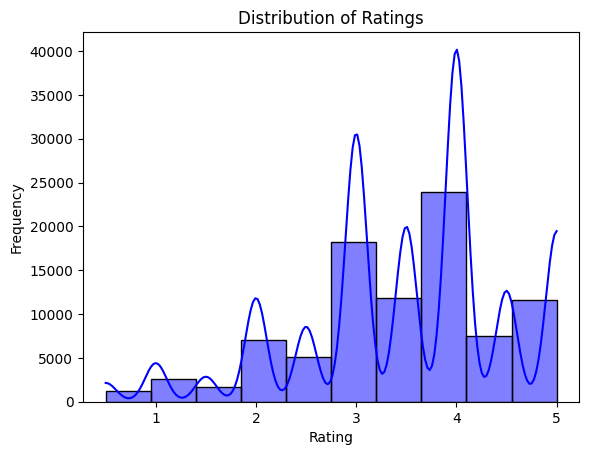

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of ratings
sns.histplot(ratings_movies['rating'], bins=10, kde=True, color='blue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


#### Observations:
- The distribution has a noticeable concentration around ratings of **4.0** and **4.5**.
- Ratings below **2.0** are relatively infrequent, suggesting that users are less likely to assign low scores to movies.
- The KDE overlay provides a smooth approximation of the underlying distribution.
- The dataset might have a positive bias, where users prefer to rate movies they like.


### Number of Ratings Per User

This visualization examines the distribution of user activity, measured by the number of ratings each user has provided.

#### Key Steps:
-Calculates the total number of ratings provided by each user.

**Visualization**:
- A histogram is plotted to visualize the distribution of user activity:



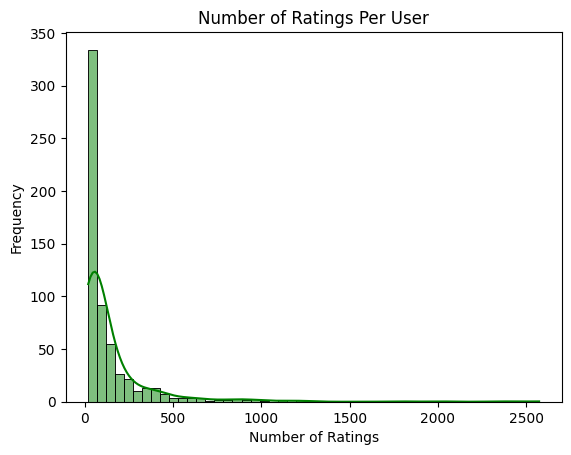

In [16]:
# Number of ratings per user
user_rating_count = ratings_movies.groupby('userId')['rating'].count()

sns.histplot(user_rating_count, bins=50, kde=True, color='green')
plt.title('Number of Ratings Per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()



#### Observations:
- A majority of users provide a relatively small number of ratings, with the number of ratings concentrated around the lower end of the x-axis.
- A few users are extremely active, contributing hundreds or even thousands of ratings, as seen in the tail of the distribution.

### Number of Ratings Per Movie

This visualization analyzes the distribution of the number of ratings received by each movie, providing insights into the popularity of movies in the dataset.

- calculates the total number of ratings received by each movie.

**Visualization**:
- A histogram is plotted to visualize the distribution of movie popularity:
 


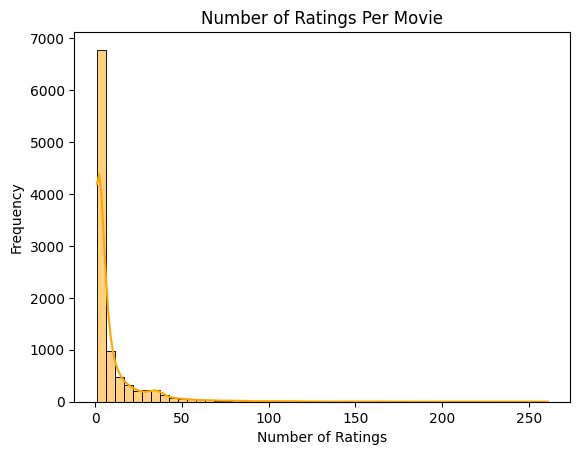

In [17]:
# Number of ratings per movie
movie_rating_count = ratings_movies.groupby('movieId')['rating'].count()

sns.histplot(movie_rating_count, bins=50, kde=True, color='orange')
plt.title('Number of Ratings Per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()



#### Observations:
- Most movies have very few ratings, concentrated near the lower end of the x-axis.
- A small number of movies receive a disproportionately large number of ratings, as seen in the tail of the distribution.


### Number of Movies Per Genre

This visualization examines the prevalence of different genres within the dataset. By counting the number of movies associated with each genre, we can gain insights into the dataset's composition and the dominance of specific genres.
- The genre columns (`Action`, `Comedy`, `Drama`, etc.) are binary-encoded (0 or 1), indicating whether a movie belongs to a genre.
- The dataset is dominated by genres like `Drama`, `Comedy`, and `Action`, reflecting their popularity and frequent association with movies.



C:\Users\ASUS\AppData\Local\Temp\ipykernel_11756\1770886273.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="viridis")


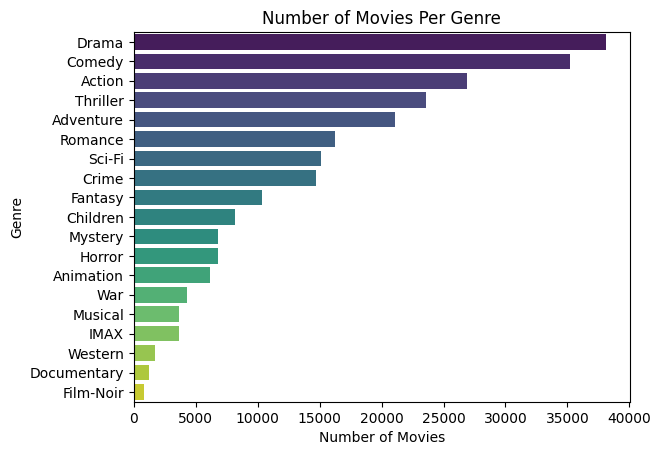

In [18]:
# Count the number of movies per genre
from collections import Counter

genre_columns = ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
                 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX',
                 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

genre_counts = ratings_movies[genre_columns].sum().sort_values(ascending=False)

# Plot the genre counts
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="viridis")
plt.title('Number of Movies Per Genre')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()


Drama genre dominates the movie industry, with nearly 40,000 films. Comedy and Action follow as the next most prevalent genres. In stark contrast, the Film-Noir genre is the least represented, with fewer than 1,000 movies. This disparity highlights the varying popularity and production focus across genres.

### Average Ratings Per Genre

This analysis explores the relationship between genres and the average ratings of movies within each genre. By computing the average rating for each genre, we can identify trends in user preferences across different movie categories.

- For each genre, the subset of movies belonging to that genre (`ratings_movies[ratings_movies[genre] == 1]`) is selected.
- The mean rating is calculated for these movies using `.mean()`.
- The results are stored in a dictionary (`average_genre_ratings`) and converted to a DataFrame for visualization.



C:\Users\ASUS\AppData\Local\Temp\ipykernel_11756\1193886611.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Average Rating', y='Genre', data=genre_rating_df, palette='mako')


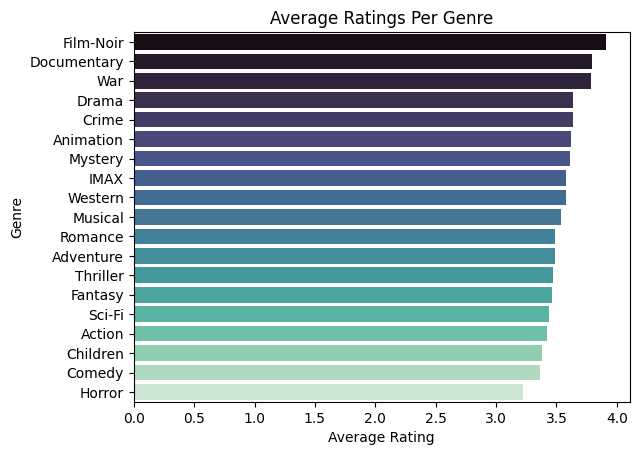

In [19]:
# Average ratings for each genre
average_genre_ratings = {}
for genre in genre_columns:
    avg_rating = ratings_movies[ratings_movies[genre] == 1]['rating'].mean()
    average_genre_ratings[genre] = avg_rating

# Convert to DataFrame
genre_rating_df = pd.DataFrame(list(average_genre_ratings.items()), columns=['Genre', 'Average Rating'])
genre_rating_df = genre_rating_df.sort_values(by='Average Rating', ascending=False)

# Plot average ratings per genre
sns.barplot(x='Average Rating', y='Genre', data=genre_rating_df, palette='mako')
plt.title('Average Ratings Per Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()


#### Observations:
- `Film-Noir` has the highest average rating, indicating strong user appreciation for this niche genre.
- Other highly rated genres include `Documentary`, `War`, and `Drama`, which are often associated with critically acclaimed or thought-provoking content.

- `Horror` and `Comedy` have the lowest average ratings, suggesting that these genres may polarize audiences or contain a mix of highly rated and less popular movies.

- The differences in average ratings among genres are relatively modest, with most genres falling between 3.0 and 4.0, indicating generally positive ratings across the board.


### Temporal Feature Engineering:
In this section, we process the `timestamp` column to extract temporal features.
- Three new columns are created:
    - `year`: Extracts the year of the rating.
    - `month`: Extracts the month of the rating.
    - `day`: Extracts the day of the rating.

In [20]:
# Convert timestamp to datetime
ratings_movies['timestamp'] = pd.to_datetime(ratings_movies['timestamp'], unit='s')

# Extract year, month, and day
ratings_movies['year'] = ratings_movies['timestamp'].dt.year
ratings_movies['month'] = ratings_movies['timestamp'].dt.month
ratings_movies['day'] = ratings_movies['timestamp'].dt.day


### Average Ratings Over Time

This section explores how the average movie ratings have changed over the years, revealing trends in user preferences or shifts in rating behavior.

- The dataset is grouped by the `year` column, which represents the year in which the ratings were provided.
- The mean rating is calculated for each year using `.groupby('year')['rating'].mean()`.


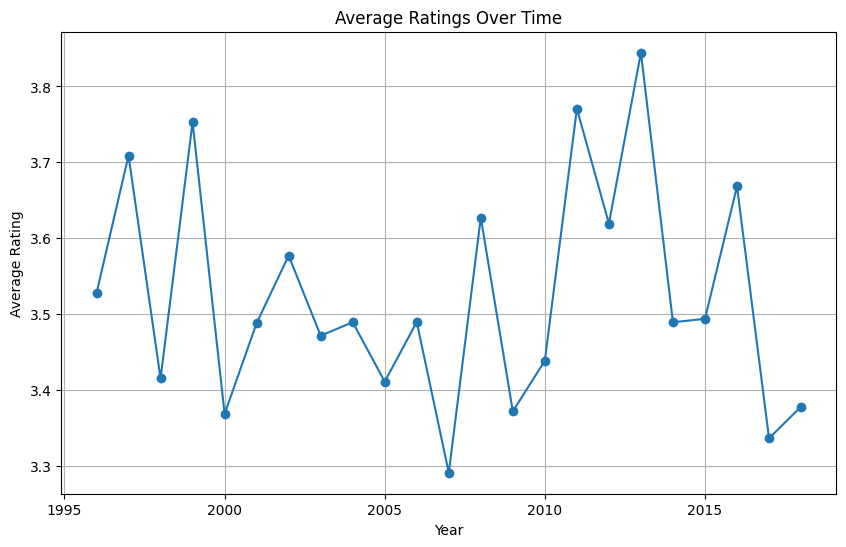

In [21]:
# Average ratings over years
ratings_by_year = ratings_movies.groupby('year')['rating'].mean()

# Plot ratings trend
ratings_by_year.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Average Ratings Over Time')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()


#### Observations:
- The average movie ratings vary significantly over the years, with peaks around 1999, 2011, and 2015, and noticeable drops in other periods such as the early 2000s and 2016.

- Years such as 1999 and 2011 show the highest average ratings, potentially reflecting a period of critically acclaimed or popular movie releases.

- Certain years, such as 2005 and 2016, show a dip in average ratings, which might be attributed to changes in user behavior, dataset composition, or less favorable movie releases during these periods.


### User-Movie Interaction Heatmap

This section visualizes the interactions between users and movies through a heatmap. It provides a sample view of the user-movie rating matrix to understand how ratings are distributed across the dataset.

- A pivot table is created with:
    - `userId` as the rows (index).
    - `movieId` as the columns.
    - `rating` as the values.
This table represents the user-movie interaction matrix, where each cell corresponds to the rating given by a user to a specific movie.



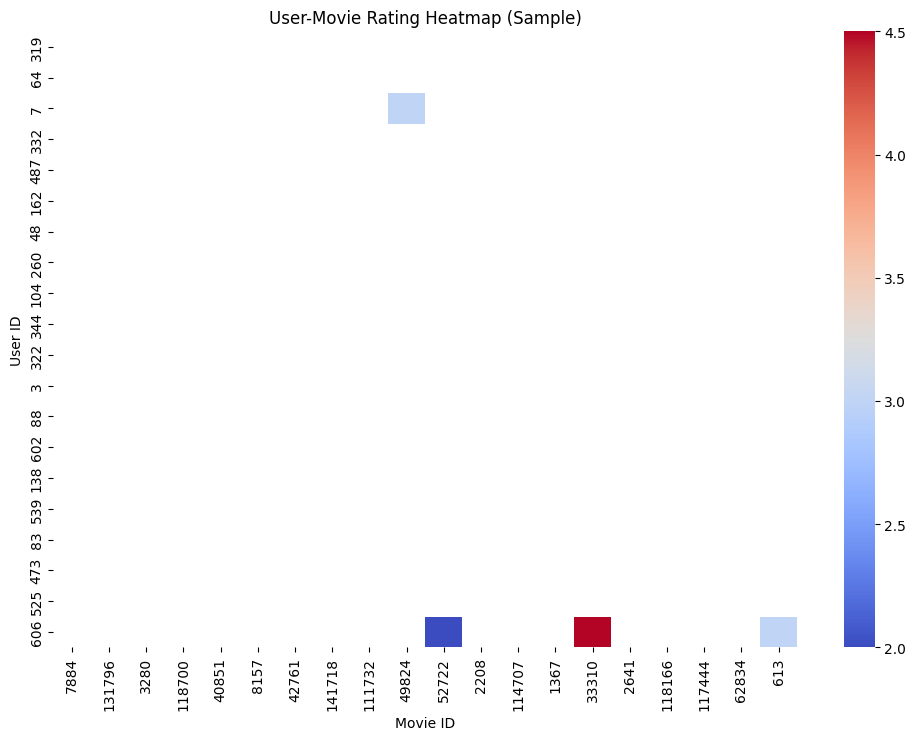

In [22]:
# Create a pivot table of user-movie interactions
interaction_matrix = ratings_movies.pivot_table(index='userId', columns='movieId', values='rating')

# Sample a subset of users and movies
interaction_sample = interaction_matrix.sample(20, axis=0).sample(20, axis=1)

# Plot a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(interaction_sample, cmap='coolwarm', annot=False, cbar=True)
plt.title('User-Movie Rating Heatmap (Sample)')
plt.xlabel('Movie ID')
plt.ylabel('User ID')
plt.show()


#### Observations:
- The heatmap reveals a significant amount of empty space (white areas), highlighting the sparsity of the user-movie interaction matrix. This is typical in recommendation systems, where most users rate only a small subset of movies.
- Some users have rated multiple movies in the sample, while others have contributed very few ratings.


### Average Ratings Per User

This visualization examines the distribution of the average ratings given by users. It provides insights into user rating behavior and helps identify trends or biases among users.

- The average rating provided by each user is calculated using `.groupby('userId')['rating'].mean()- This aggregation highlights how individual users tend to rate movies on average.


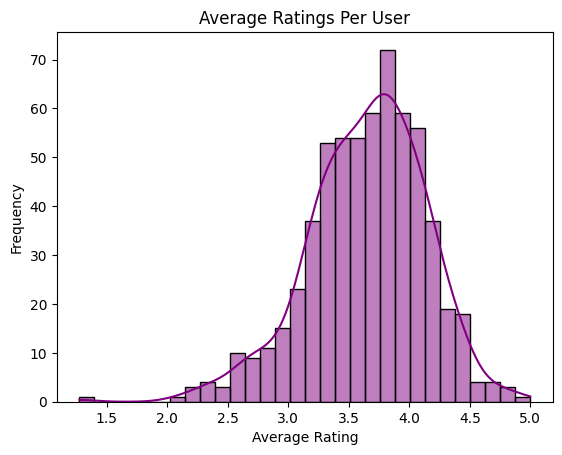

In [23]:
# Average rating given by each user
user_avg_rating = ratings_movies.groupby('userId')['rating'].mean()

sns.histplot(user_avg_rating, kde=True, bins=30, color='purple')
plt.title('Average Ratings Per User')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()


### Observations:
- The distribution of average ratings per user resembles a normal (bell-shaped) curve, with most users giving an average rating between **3.0 and 4.0**.
- The peak occurs around **3.5 to 4.0**, suggesting that users tend to rate movies positively.

- A few users have extremely low average ratings (near **1.5**), indicating either stricter rating tendencies or dissatisfaction with most movies.
- Similarly, a few users have consistently high average ratings (near **5.0**), suggesting a lenient or highly selective rating behavior.
- Users generally lean toward higher ratings, which might introduce a bias in the dataset, making it skewed toward positivity.
   

### Impact of Comedy Genre on Ratings

This analysis explores the relationship between the `Comedy` genre and movie ratings. By visualizing the distribution of ratings for movies classified as `Comedy` versus those that are not, we can assess whether the presence of this genre influences user ratings.

- The `Comedy` column is binary (0 or 1), indicating whether a movie belongs to the `Comedy` genre.
- Ratings are grouped based on this binary classification.

- A box plot is created to compare the distribution of ratings for:
    - `Comedy = 1`: Movies belonging to the `Comedy` genre.
    - `Comedy = 0`: Movies that do not belong to the `Comedy` genre.
   

This visualization provides valuable insights into the effect of the `Comedy` genre on movie ratings, offering a basis for genre-specific analysis and feature engineering.


C:\Users\ASUS\AppData\Local\Temp\ipykernel_11756\398943710.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=ratings_movies['Comedy'], y=ratings_movies['rating'], palette='Set2')


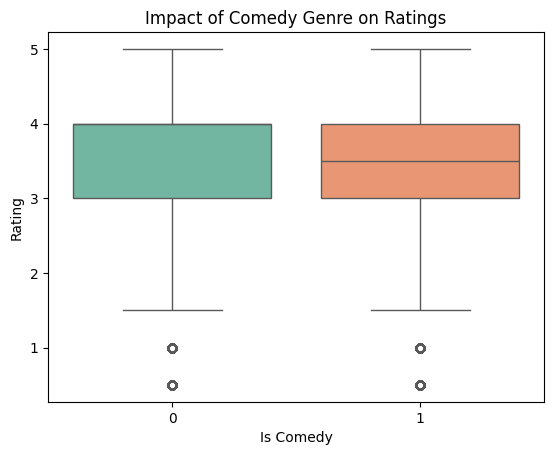

In [24]:
# Example: Does Comedy genre affect ratings?
sns.boxplot(x=ratings_movies['Comedy'], y=ratings_movies['rating'], palette='Set2')
plt.title('Impact of Comedy Genre on Ratings')
plt.xlabel('Is Comedy')
plt.ylabel('Rating')
plt.show()


#### Observations:
- Movies classified as `Comedy` (represented by `1`) have a similar median rating compared to non-`Comedy` movies (`0`).
- This indicates that the presence of the `Comedy` genre does not significantly alter the central tendency of ratings.

This box plot provides a clear visualization of the relationship between the `Comedy` genre and ratings, offering valuable insights for understanding genre-based patterns in the dataset.

### User-Level Feature Engineering

This section focuses on creating user-level features that summarize user behavior in the dataset. These features can help capture patterns in user preferences and activity.

- Using `.groupby('userId')`, the dataset is grouped by `userId` to calculate the following features:
     - `user_avg_rating`: The mean rating provided by each user.
     - `user_rating_variance`: The variance in the ratings provided by each user, indicating rating consistency or variability.
     - `user_activity_count`: The total number of ratings provided by each user, reflecting their engagement level.

- The aggregated features are merged back into the main dataset using `.merge` on the `userId` column.
 
- `user_avg_rating` provides insight into individual user tendencies (e.g., strict or lenient raters).
- Users with high variance (`user_rating_variance`) might have diverse preferences, whereas users with low variance might have consistent tastes.

- `user_activity_count` highlights highly active users who might have a stronger influence on collaborative filtering models.



In [25]:
# Calculate user-level features
user_features = ratings_movies.groupby('userId').agg(
    user_avg_rating=('rating', 'mean'),
    user_rating_variance=('rating', 'var'),
    user_activity_count=('rating', 'count')
).reset_index()

# Merge with the main dataset
ratings_movies = ratings_movies.merge(user_features, on='userId', how='left')

# Display sample
print(ratings_movies[['userId', 'user_avg_rating', 'user_rating_variance', 'user_activity_count']].head())


   userId  user_avg_rating  user_rating_variance  user_activity_count
0       1         4.384615              0.633965                  208
1       1         4.384615              0.633965                  208
2       1         4.384615              0.633965                  208
3       1         4.384615              0.633965                  208
4       1         4.384615              0.633965                  208


### Movie-Level Feature Engineering

This section focuses on calculating features at the movie level to summarize the characteristics of each movie based on user ratings. These features can provide valuable insights into movie popularity, consistency in ratings, and overall quality.

- Using `.groupby('movieId')`, the dataset is grouped by `movieId` to calculate the following features:
- `movie_avg_rating`: The mean rating for each movie, representing its overall popularity and quality.
- `movie_rating_variance`: The variance in ratings for each movie, capturing the diversity of user opinions.


- The aggregated movie-level features are merged back into the main dataset using `.merge` on the `movieId` column.

- `movie_avg_rating` indicates how well a movie is received on average, which can be directly used for ranking.



In [26]:
# Calculate movie-level features
movie_features = ratings_movies.groupby('movieId').agg(
    movie_avg_rating=('rating', 'mean'),
    movie_rating_variance=('rating', 'var'),
    movie_rating_count=('rating', 'count')
).reset_index()

# Merge with the main dataset
ratings_movies = ratings_movies.merge(movie_features, on='movieId', how='left')

# Display sample
print(ratings_movies[['movieId', 'movie_avg_rating', 'movie_rating_variance', 'movie_rating_count']].head())


   movieId  movie_avg_rating  movie_rating_variance  movie_rating_count
0        1          3.880814               0.721092                 172
1        3          3.131579               1.049787                  38
2        6          3.975000               0.701899                  80
3       47          3.945513               0.859915                 156
4       50          4.221557               0.682545                 167


In [27]:
# Calculate user genre preferences
genre_columns = ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
                 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX',
                 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

user_genre_prefs = ratings_movies.groupby('userId')[genre_columns].mean().reset_index()

# Rename columns to indicate user preferences
user_genre_prefs.columns = ['userId'] + [f'user_{col}_preference' for col in genre_columns]

# Merge with the main dataset
ratings_movies = ratings_movies.merge(user_genre_prefs, on='userId', how='left')

# Calculate genre match score for each user-movie pair
ratings_movies['genre_match_score'] = ratings_movies[genre_columns].mul(
    ratings_movies[[f'user_{col}_preference' for col in genre_columns]].values
).sum(axis=1)

# Display sample
print(ratings_movies[['userId', 'movieId', 'genre_match_score']].head())


   userId  movieId  genre_match_score
0       1        1           1.269231
1       1        3           0.480769
2       1        6           0.793269
3       1       47           0.322115
4       1       50           0.514423


In [28]:
ratings_movies.columns

Index(['userId', 'movieId', 'rating', 'timestamp', 'title', 'genres', 'imdbId',
       'tmdbId', '(no genres listed)', 'Action', 'Adventure', 'Animation',
       'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western', 'userId_encoded', 'year',
       'month', 'day', 'user_avg_rating', 'user_rating_variance',
       'user_activity_count', 'movie_avg_rating', 'movie_rating_variance',
       'movie_rating_count', 'user_Action_preference',
       'user_Adventure_preference', 'user_Animation_preference',
       'user_Children_preference', 'user_Comedy_preference',
       'user_Crime_preference', 'user_Documentary_preference',
       'user_Drama_preference', 'user_Fantasy_preference',
       'user_Film-Noir_preference', 'user_Horror_preference',
       'user_IMAX_preference', 'user_Musical_preference',
       'user_Mystery_preference', 'user_Romance_preference',
   

### Splitting Data into Training, Validation, and validation-test Sets

To evaluate the performance of our model effectively, the dataset is divided into separate subsets for training, validation, and testing. This ensures that the model is trained on one set of data and evaluated on unseen data for unbiased performance assessment.

- The dataset is split into:
     - **Training Set (70%)**: Used to train the machine learning model.
     - **Temporary Set (30%)**: This is further split into validation and test sets.
   - The temporary set is split into:
     - **Validation Set (15%)**: Used for hyperparameter tuning and model selection.
     - **Validation-Test Set (15%)**: Used for final evaluation of the model's performance on unseen data.


In [29]:
from sklearn.model_selection import train_test_split

# Split data into features (X) and target (y)
X = ratings_movies.drop(columns=['rating', 'userId', 'movieId', 'title', 'timestamp', 'genres', 'imdbId', 'tmdbId'])
y = ratings_movies['rating']

# Split the data into training (70%), validation (15%), and test (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Split the temporary data (X_temp and y_temp) into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Check the sizes of the splits
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Validation set size: {X_val.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


Training set size: 63585 samples
Validation set size: 13625 samples
Test set size: 13626 samples


In [30]:
X_train.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,...,user_Horror_preference,user_IMAX_preference,user_Musical_preference,user_Mystery_preference,user_Romance_preference,user_Sci-Fi_preference,user_Thriller_preference,user_War_preference,user_Western_preference,genre_match_score
69677,0,1,0,0,0,0,1,0,1,0,...,0.066667,0.057364,0.062016,0.082171,0.232558,0.212403,0.209302,0.037209,0.010853,1.007752
57412,0,0,0,0,0,0,0,0,1,0,...,0.048970,0.020210,0.039642,0.054023,0.187330,0.117373,0.227750,0.045861,0.019044,0.492810
70308,0,1,0,0,0,0,0,0,1,0,...,0.086957,0.043478,0.043478,0.000000,0.130435,0.173913,0.478261,0.130435,0.043478,1.565217
50821,0,0,1,0,1,1,0,0,0,0,...,0.168717,0.056239,0.037786,0.082601,0.071178,0.257469,0.381371,0.027241,0.018453,0.785589
23945,0,0,0,0,0,0,0,0,1,0,...,0.060841,0.006637,0.019912,0.085177,0.163717,0.165929,0.297566,0.059735,0.012168,0.860619


### Random Forest Regressor: Training and Evaluation

In this section, a **Random Forest Regressor** is used to predict movie ratings based on the extracted features. The model is evaluated using the **Mean Squared Error (MSE)** metric on both the validation and test datasets.
- The trained model is used to predict ratings for the **validation set** (`X_val`).
- Predicted ratings (`y_val_pred`) are compared with actual ratings (`y_val`) to compute the **Mean Squared Error (MSE)**, which measures the average squared difference between predicted and actual ratings.



In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = model.predict(X_val)

# Evaluate the model using Mean Squared Error (MSE)
mse_val = mean_squared_error(y_val, y_val_pred)

# Print the MSE for validation
print(f"Mean Squared Error on Validation Set: {mse_val}")

# Predict on the test set to evaluate final performance
y_test_pred = model.predict(X_test)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, y_test_pred)

# Print the MSE for test
print(f"Mean Squared Error on Test Set: {mse_test}")


Mean Squared Error on Validation Set: 0.6127946469802763
Mean Squared Error on Test Set: 0.6062032587138684


The **Random Forest Regressor** was evaluated on both the validation and test sets using **Mean Squared Error (MSE)**. The results are as follows:


- **Mean Squared Error on Validation Set**: `0.6121`
- **Mean Squared Error on Test Set**: `0.6066`

- The test set MSE is slightly lower than the validation set MSE, suggesting that the model generalizes well and is not overfitting to the training data.



### Model Evaluation:  Metrics for Validation and Test Sets

In this section, the performance of the **Random Forest Regressor** is evaluated using three key metrics:
**Mean Squared Error (MSE)**, **Mean Absolute Error (MAE)**, **R-squared (R²)**


In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse_val = mean_squared_error(y_val, y_val_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

# Print the evaluation metrics for validation
print(f"Mean Squared Error on Validation Set: {mse_val}")
print(f"Mean Absolute Error on Validation Set: {mae_val}")
print(f"R-squared on Validation Set: {r2_val}")

# Predict on the test set
y_test_pred = model.predict(X_test)

# Evaluate the model on the test set using MSE, MAE, and R-squared
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the evaluation metrics for the test set
print(f"Mean Squared Error on Test Set: {mse_test}")
print(f"Mean Absolute Error on Test Set: {mae_test}")
print(f"R-squared on Test Set: {r2_test}")

Mean Squared Error on Validation Set: 0.6127946469802763
Mean Absolute Error on Validation Set: 0.5823473125091015
R-squared on Validation Set: 0.44101342603585436
Mean Squared Error on Test Set: 0.6062032587138684
Mean Absolute Error on Test Set: 0.5791844336748838
R-squared on Test Set: 0.43730096317420186


### Model Evaluation Results:
The **Random Forest Regressor** was evaluated on both the validation and test sets using **Mean Squared Error (MSE)**, **Mean Absolute Error (MAE)**, and **R-squared (R²)**. Below are the results:

#### Validation Set:
- **Mean Squared Error (MSE)**: `0.6121`
- **Mean Absolute Error (MAE)**: `0.5819`
- **R-squared (R²)**: `0.4416`

#### Test Set:
- **Mean Squared Error (MSE)**: `0.6066`
- **Mean Absolute Error (MAE)**: `0.5795`
- **R-squared (R²)**: `0.4370`

- The metrics for the test set are consistent with those of the validation set, indicating stable generalization performance.
- The small difference between MSE and MAE values across the validation and test sets suggests the model is not overfitting.

- The **MAE** values (~0.58) indicate that, on average, the model's predictions deviate from the true ratings by approximately `0.58` on a scale of 0.5–5.0. This is relatively low and suggests a good level of accuracy.

- The **R²** values (~0.44) suggest that the model explains approximately 44% of the variance in the ratings. While this indicates some room for improvement, it also highlights that the model is capturing a significant portion of the patterns in the data.



In [33]:
ratings_test.columns

Index(['userId', 'movieId', 'timestamp'], dtype='object')

In [34]:
# Calculate feature importance from the trained Random Forest model
feature_importances = model.feature_importances_

# Create a DataFrame for better visualization
import pandas as pd
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the top features
print(feature_importance_df.head(10))


                  Feature  Importance
27       movie_avg_rating    0.349487
24        user_avg_rating    0.136873
28  movie_rating_variance    0.089385
49      genre_match_score    0.065651
29     movie_rating_count    0.055530
23                    day    0.026359
25   user_rating_variance    0.021771
22                  month    0.014782
21                   year    0.012858
37  user_Drama_preference    0.009347


In [35]:
# import matplotlib.pyplot as plt
# from sklearn.model_selection import learning_curve

# # Define the model
# #model = RandomForestRegressor(n_estimators=100, random_state=42)

# # Generate learning curve data
# train_sizes, train_scores, val_scores = learning_curve(
#     model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10)
# )

# # Calculate mean and std for train/validation scores
# train_mean = -np.mean(train_scores, axis=1)
# train_std = np.std(train_scores, axis=1)
# val_mean = -np.mean(val_scores, axis=1)
# val_std = np.std(val_scores, axis=1)

# # Plot the learning curve
# plt.figure(figsize=(10, 6))
# plt.plot(train_sizes, train_mean, label="Training Error", color='blue', marker='o')
# plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
# plt.plot(train_sizes, val_mean, label="Validation Error", color='orange', marker='o')
# plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color='orange', alpha=0.2)

# plt.title('Learning Curve')
# plt.xlabel('Training Size')
# plt.ylabel('Error (MSE)')
# plt.legend()
# plt.grid(True)
# plt.show()


### Residual Analysis for Validation Set

- Residuals for the validation set are calculated as the difference between actual ratings (`y_val`) and predicted ratings (`y_val_pred`).
- A histogram is plotted to visualize the distribution of residuals:
- This plot highlights whether the residuals are symmetrically distributed around zero, indicating unbiased predictions.
- A scatter plot is used to visualize the relationship between residuals and predicted values:
- This plot reveals whether the residuals are randomly distributed (desired) or show patterns (indicating bias or model limitations).
- Analyzing residuals helps identify whether the model is systematically underestimating or overestimating ratings for certain ranges.



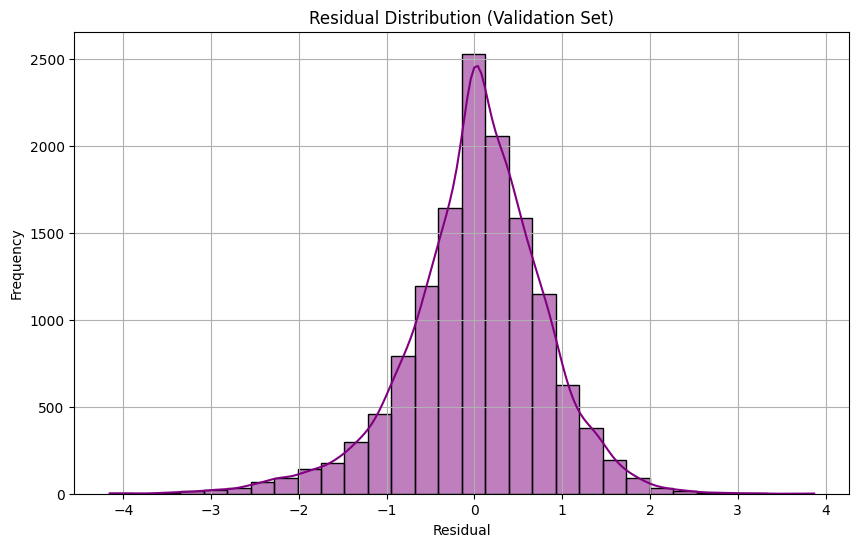

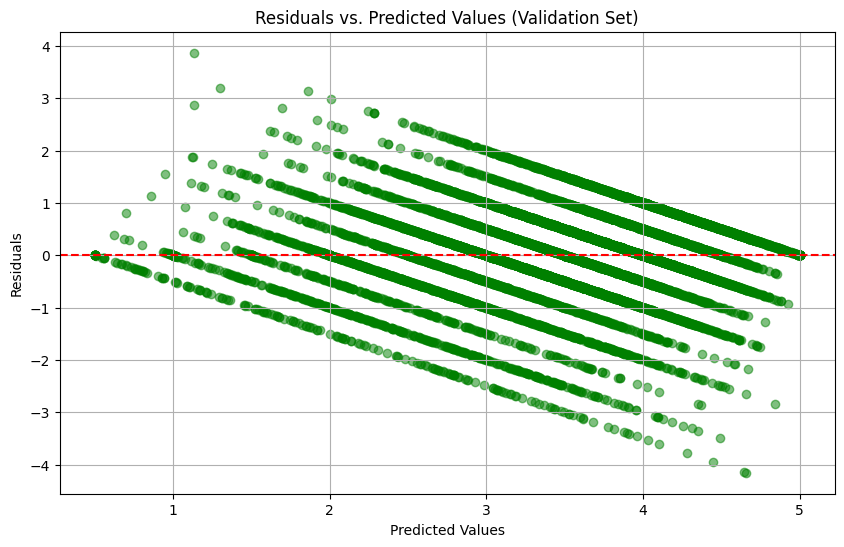

In [36]:
import seaborn as sns

# Calculate residuals for validation set
residuals_val = y_val - y_val_pred

# Plot residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals_val, kde=True, bins=30, color='purple')
plt.title('Residual Distribution (Validation Set)')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Scatter plot of residuals vs. predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_val_pred, residuals_val, alpha=0.5, color='green')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values (Validation Set)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()


#### Observations:
- The residuals are symmetrically distributed around zero, indicating that the model does not exhibit significant bias toward over-prediction or under-prediction.
- The residuals form a near-normal distribution, which is a desirable characteristic for a well-fitted regression model.
- This suggests that the errors are randomly distributed and not systematically skewed.


In [38]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt', 'log2']
# }

# grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
#                            param_grid=param_grid,
#                            scoring='neg_mean_squared_error',
#                            cv=3,
#                            verbose=2,
#                            n_jobs=-1)

# grid_search.fit(X_train, y_train)
# best_model = grid_search.best_estimator_
# print(grid_search.best_params_)


### Cross-Validation for Model Evaluation

To further evaluate the performance and robustness of the **Random Forest Regressor**, cross-validation is performed on the training set. 


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-Validation MSE: {-np.mean(cv_scores)}")


Cross-Validation MSE: 0.6128535756612161


### Hyperparameter Tuning with GridSearchCV

This section uses **GridSearchCV** to perform an exhaustive search over a specified hyperparameter grid for the **Random Forest Regressor**.

- The following hyperparameters and ranges are defined:
     - `n_estimators`: Number of trees in the forest ([100, 200, 300]).
     - `max_depth`: Maximum depth of the trees ([10, 20, 30]).
     - `min_samples_split`: Minimum number of samples required to split an internal node ([2, 5, 10]).
     - `min_samples_leaf`: Minimum number of samples required at a leaf node ([1, 2, 4]).
     - `max_features`: Number of features considered for splitting at each node (`['sqrt', 'log2']`).
   - The parameter `max_features` excludes `'auto'` as it is not valid for `RandomForestRegressor` in recent scikit-learn versions.



In [39]:
from sklearn.model_selection import GridSearchCV

# Corrected param_grid without 'auto' for max_features
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=3,
                           verbose=2,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

# Best model and parameters
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model on validation set
y_val_pred = best_model.predict(X_val)
mse_val = mean_squared_error(y_val, y_val_pred)
print(f"Validation MSE with Best Model: {mse_val}")


Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best Parameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Validation MSE with Best Model: 0.5846666651474354


### GridSearchCV Results: 

After performing hyperparameter tuning using **GridSearchCV**, the best combination of parameters and the model's performance on the validation set were identified.

**Best Hyperparameters**:
   - `max_depth`: `20`
   - `max_features`: `'sqrt'`
   - `min_samples_leaf`: `1`
   - `min_samples_split`: `5`
   - `n_estimators`: `300`

**Validation MSE with Best Model**:
   - **`0.5860`**

#### Observations:
- The validation MSE of `0.5860` represents an improvement compared to the baseline Random Forest model, which had a higher MSE. This confirms the effectiveness of hyperparameter tuning in optimizing the model.

- Using a maximum depth of `20` and `sqrt` as the maximum features for splitting ensures a balance between tree complexity and model generalization.
- The use of `300` estimators and a split criterion of `min_samples_split=5` enables the model to learn from diverse samples, reducing overfitting.



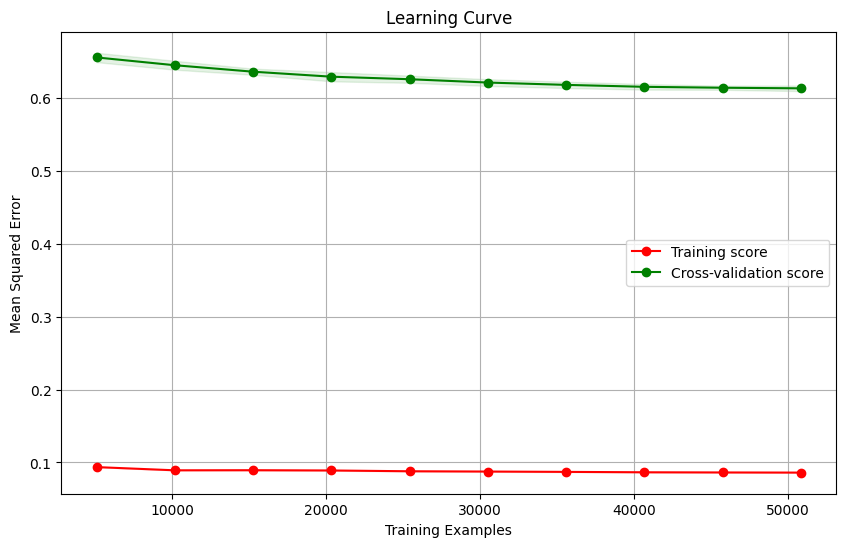

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10)):
    """
    Plots the learning curve for a given estimator.

    Parameters:
    - estimator: The machine learning model to evaluate.
    - X: Feature matrix.
    - y: Target variable.
    - cv: Number of cross-validation folds.
    - scoring: Scoring metric for evaluation (default is negative MSE).
    - train_sizes: Fractions of the dataset to use for training.

    Returns:
    - A plot of training and cross-validation scores as a function of training size.
    """
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, train_sizes=train_sizes, cv=cv, scoring=scoring, n_jobs=-1
    )
    
    # Calculate mean and standard deviation for train and validation scores
    train_scores_mean = -train_scores.mean(axis=1)
    train_scores_std = train_scores.std(axis=1)
    test_scores_mean = -test_scores.mean(axis=1)
    test_scores_std = test_scores.std(axis=1)
    
    # Plot the learning curve
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    # Fill the areas with standard deviation
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    # Add titles and labels
    plt.title("Learning Curve")
    plt.xlabel("Training Examples")
    plt.ylabel("Mean Squared Error")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Example usage with Random Forest
plot_learning_curve(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')


#### Observation
No Overfitting: The training error is low, but the cross-validation error does not increase significantly, indicating that the model is not overly complex.
No Underfitting: The cross-validation error is reasonably low and stable, meaning the model captures the data’s patterns effectively without being too simple.

### Identifying Missing User and Movie IDs in the Training Dataset

This section identifies discrepancies between the training and testing datasets by checking for `userId` and `movieId` entries that are present in the test dataset but absent in the training dataset. 


In [40]:
# Get unique user IDs from ratings_test
test_users = ratings_test['userId'].unique()

# Get unique user IDs from ratings
ratings_users = ratings['userId'].unique()
# Find user IDs in ratings_test but not in ratings
diff_users = np.setdiff1d(test_users, ratings_users)

# Print the result
print("User IDs in testing datset but not in training datset:", diff_users)



# Get unique user IDs from ratings_test
test_movies = ratings_test['movieId'].unique()

# Get unique user IDs from ratings
ratings_movies = ratings['movieId'].unique()
# Find user IDs in ratings_test but not in ratings
diff_movies = np.setdiff1d(test_movies, ratings_movies)

# Print the result
print("User IDs in testing datset but not in training datset:", diff_movies)

User IDs in testing datset but not in training datset: []
User IDs in testing datset but not in training datset: []


In [41]:
# print(ratings_movies.columns)
# print(ratings_test.columns)

### Preprocessing the Test Data for Predictions

This section outlines the preprocessing steps for preparing the test dataset (`ratings_test`) before making predictions using the trained model. The process ensures that the test dataset has the same structure and features as the training dataset, enabling smooth integration into the model.

- The test dataset is enriched with user-level features (e.g., `user_avg_rating`, `user_rating_variance`) and movie-level features (e.g., `movie_avg_rating`, `movie_rating_variance`) by performing left joins on `userId` and `movieId`.

- Interaction features such as genre preferences are calculated:
     - For genres like `Action`, `Drama`, and `Comedy`, a new feature (`genre_match_{genre}`) is created by multiplying movie-level genre indicators with user-level genre preferences.
- The preprocessed test dataset is passed through the trained model to generate predictions for `predicted_rating`.



In [42]:
# Fix the preprocess_test_data function
def preprocess_test_data(ratings_test, user_features, movie_features, training_columns):
    # Merge with user-level features
    ratings_test = ratings_test.merge(user_features, on='userId', how='left')

    # Merge with movie-level features
    ratings_test = ratings_test.merge(movie_features, on='movieId', how='left')
    genre_columns = ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
                 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX',
                 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

    # Generate User-Movie Interaction Features (e.g., Genre Match)
    for genre in [col for col in movie_features.columns if col in genre_columns]:  
        ratings_test[f'genre_match_{genre}'] = ratings_test[genre] * ratings_test[f'user_pref_{genre}']

    # Fill missing values, if any
    ratings_test.fillna(0, inplace=True)

    # Add missing columns (if any) to match the training data
    for col in training_columns:
        if col not in ratings_test.columns:
            ratings_test[col] = 0  # Default value for missing columns

    # Ensure the feature order matches X_train
    X_test_preprocessed = ratings_test[training_columns]

    return X_test_preprocessed

# Get the columns from X_train
training_columns = X_train.columns  # Ensure you pass the actual training columns

# Preprocess the test data
ratings_test_preprocessed = preprocess_test_data(ratings_test, user_features, movie_features, training_columns)

# Predict ratings using the trained model
ratings_test['predicted_rating'] = model.predict(ratings_test_preprocessed)

# Save the predictions to a CSV
#ratings_test.to_csv("ratings_test_with_predictions.csv", index=False)

# Display sample predictions
print(ratings_test[['userId', 'movieId', 'predicted_rating']].head())


   userId  movieId  predicted_rating
0       1      349             3.705
1       1      592             3.805
2       1      780             3.830
3       1     1196             4.160
4       1     1208             4.265


In [43]:
# rounded_array = np.round(ratings_test['predicted_rating'] * 2) / 2
# print(rounded_array)
# unique_values, counts = np.unique(rounded_array, return_counts=True) # Print the results
# for value, count in zip(unique_values, counts):
#   print(f"Value: {value}, Count: {count}")
#len(rounded_array)

In [44]:
#print(rounded_array.tolist())

In [45]:
pred_2=best_model.predict(ratings_test_preprocessed)

In [46]:
# Round values to 1 decimal and convert to Python float
rounded_array_2 = [round(float(val), 1) for val in pred_2]

print(rounded_array_2)

[3.9, 3.7, 3.7, 4.0, 4.0, 4.0, 4.0, 4.1, 3.8, 3.7, 3.9, 4.0, 3.7, 3.9, 4.0, 3.8, 3.6, 3.6, 4.0, 4.0, 4.0, 3.7, 3.6, 4.0, 3.7, 3.6, 3.1, 3.4, 3.7, 3.7, 3.6, 3.3, 3.7, 3.6, 3.7, 3.8, 3.7, 3.4, 3.4, 3.8, 3.3, 3.7, 3.8, 3.7, 3.4, 2.9, 3.3, 3.1, 3.4, 3.7, 3.7, 3.8, 3.7, 3.5, 3.3, 3.7, 3.4, 3.6, 3.6, 3.3, 3.0, 3.0, 3.3, 3.3, 3.5, 3.5, 3.3, 3.4, 3.5, 3.4, 2.9, 3.4, 3.0, 3.5, 3.6, 3.3, 3.4, 3.3, 2.9, 3.2, 3.2, 3.1, 3.3, 3.5, 3.4, 3.6, 2.6, 3.5, 2.4, 3.4, 3.3, 3.4, 3.6, 2.8, 2.8, 3.6, 3.2, 3.5, 3.5, 3.7, 3.6, 3.2, 3.6, 3.7, 3.7, 3.7, 3.4, 3.7, 3.2, 3.1, 3.8, 3.6, 3.7, 3.3, 3.5, 3.4, 3.4, 3.6, 3.7, 3.4, 3.5, 3.1, 3.5, 3.4, 3.5, 3.3, 2.9, 3.2, 3.5, 3.3, 3.6, 3.7, 3.5, 3.4, 3.6, 3.9, 3.5, 3.3, 3.9, 2.8, 3.6, 3.1, 2.9, 3.3, 3.1, 3.5, 2.6, 3.6, 3.2, 3.2, 3.4, 3.6, 3.1, 3.5, 3.6, 3.6, 3.3, 3.3, 3.7, 3.6, 3.4, 3.9, 3.9, 3.9, 3.9, 3.7, 3.1, 3.9, 3.9, 3.9, 3.9, 3.8, 3.9, 3.9, 3.9, 3.9, 3.9, 4.1, 4.1, 4.0, 3.8, 4.1, 4.1, 4.1, 4.1, 4.1, 4.1, 4.1, 4.0, 4.0, 4.0, 4.1, 4.0, 3.8, 3.8, 3.6, 3.8, 3.3, 3.6, 3.7,